# การทำ Web Scraping ด้วย Python

ก่อนอื่นเรามาทำการ Import Library ต่างๆ ที่จำเป็นต้องใช้กัน

- `urllib` ใช้ในการเปิด url และโหลดหน้าเวบเพจ
- `BeautifulSoup` ใช้ในการประมวลผลหน้า HTML 
- `sleep` ใช้ในการรอก่อนจะส่ง request หน้าเวบอันต่อไป
- `copy` ใช้ในการ copy object 

In [1]:
import urllib
from bs4 import BeautifulSoup
from time import sleep
import copy

ทดลองดึงข้อมูล GDH จาก Wikipedia https://th.wikipedia.org/wiki/จีดีเอช_ห้าห้าเก้า

<img src="https://dl.dropboxusercontent.com/s/d9v1evdksbkk6m6/Screen%20Shot%202021-09-06%20at%2015.31.02.png?dl=0"/>

โดยปกติแล้ว url จะต้องประกอบไปด้วยตัวอักษร ASCII เท่านั้น นั่นคือเป็นภาษาไทยไม่ได้! เราจะต้องทำการแปลง (หรือเรียกว่าการ quote string) ให้อยู่ในรูปแบบของ percent-encoded string เสียก่อนโดยใช้ฟังก์ชัน `urllib.quote()` (ปกติ browser ของเราจะทำการแปลงให้อัตโนมัติ ถ้าเราพิมพ์ภาษาไทยเข้าไป) 

# Section 1 : Quote/Unquote

In [2]:
page = 'จีดีเอช'

print('จีดีเอช' + ' => ' + urllib.parse.quote(page)) # Use urllib.quote() for Python 2

url = 'http://th.wikipedia.org/wiki/' + page

print("\n")
print(url)

จีดีเอช => %E0%B8%88%E0%B8%B5%E0%B8%94%E0%B8%B5%E0%B9%80%E0%B8%AD%E0%B8%8A


http://th.wikipedia.org/wiki/จีดีเอช


In [3]:
# ----- TO DO 1.1 ----- 
# แปลงข้อมูลในตัวแปร page โดยใช้ urllib.parse.quote() ให้อยู่ในรูปแบบ percent-encoded string 
# แล้วนำไปต่อท้าย 'http://th.wikipedia.org/wiki/' แล้วเก็บไว้ในตัวแปร url ตามเดิม
quoted_page = urllib.parse.quote(page)
url = 'http://th.wikipedia.org/wiki/' + quoted_page
print(url)

http://th.wikipedia.org/wiki/%E0%B8%88%E0%B8%B5%E0%B8%94%E0%B8%B5%E0%B9%80%E0%B8%AD%E0%B8%8A


ผลลัพธ์ที่ควรจะได้คือ 

result

เมื่อได้ url ที่พร้อมใช้งานแล้ว เราก็เรียก `urllib.urlopen()` ตามด้วยคำสั่ง `read()` เพื่ออ่านไฟล์ HTML ได้เลย 

ก่อนจะ `print()` เราอาจจะอยาก unquote string ก่อน เพื่อให้เราอ่าน url ใน link ต่างๆ บนหน้า HTML ที่เป็นภาษาไทยได้ง่ายขึ้น (ไม่เชื่อลอง `print()` แบบไม่ unquote ดู!)

หมายเหตุ : บางฟังก์ชั่น `str` นั้นอาจจะสามารถแปลงไฟล์ HTML ที่ได้มาเป็นภาษาไทยได้สมบูรณ์ (จะติดเป็นรหัส ASCII) ซึ่งหากเป็นอย่างนั้น เราจะต้องใช้ฟังก์ชั่น `str.decode()` ในการแปลงไฟล์ HTML แทน ซึ่งจะให้ผลลัพธ์ที่สมบูรณ์กว่า ไม่เชื่อก็ลองดู!

In [4]:
html = urllib.request.urlopen(url).read() 

# ลองสังเกตผลก่อนหลัง unquote ดูสิ

print(str(html)[49470:49470+250])

print('\n')

print(html.decode()[49470:49470+250])

print('\n')

print(urllib.parse.unquote(html.decode()[49470:49470+250]))

e0\xb8\xb7\xe0\xb9\x88\xe0\xb8\xad\xe0\xb8\x99..\xe0\xb8\x97\xe0\xb8\xb5\xe0\xb9\x88\xe0\xb8\xa3\xe0\xb8\xb0\xe0\xb8\xa5\xe0\xb8\xb6\xe0\xb8\x81_\xe0\xb9\x81\xe0\xb8\xa5\xe0\xb8\xb0\xe0\xb8\xa0\xe0\xb8\xb2\xe0\xb8\x9e\xe0\xb8\xa2\xe0\xb8\x99\xe0\xb8\


B8%B9%E0%B8%A1%E0%B8%B4" title="ภาคภูมิ วงศ์ภูมิ">ภาคภูมิ วงศ์ภูมิ</a>
</p><p>จีดีเอช ร่วมกับสิงห์ คอร์เปอเรชัน ได้ผลิตภาพยนตร์เรื่อง <i><a href="/wiki/%E0%B8%9E%E0%B8%A3%E0%B8%88%E0%B8%B2%E0%B8%81%E0%B8%9F%E0%B9%89%E0%B8%B2" title="พรจากฟ้า">พรจากฟ้


B8�มิ" title="ภาคภูมิ วงศ์ภูมิ">ภาคภูมิ วงศ์ภูมิ</a>
</p><p>จีดีเอช ร่วมกับสิงห์ คอร์เปอเรชัน ได้ผลิตภาพยนตร์เรื่อง <i><a href="/wiki/พรจากฟ้า" title="พรจากฟ้า">พรจากฟ้


# Section 2 : BeautifulSoup

จากนั้นก็เรียกใช้งาน BeautifulSoup เพื่อทำการประมวลผล (parse) หน้า HTML ที่เราได้มา 

In [5]:
soup = BeautifulSoup(html, 'html.parser')

# เลือกมาแสดงผลแค่ 1,000 อักขระจะได้ไม่ยาวจนเกินไป
# เมธอด .prettify จะช่วยจัดหน้า html ให้สวยงามและดูง่ายขึ้น

print(soup.prettify()[:1000])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="th">
 <head>
  <meta charset="utf-8"/>
  <title>
   จีดีเอช - วิกิพีเดีย
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"thai","wgMonthNames":["","มกราคม","กุมภาพันธ์","มีนาคม","เมษายน","พฤษภาคม","มิถุนายน","กรกฎาคม","สิงหาคม","กันยายน","ตุลาคม","พฤศจิกายน","ธันวาคม"],"wgRequestId":"df9f3df5-0d03-4b12-a1df-2677009d686b","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"จีดีเอช","wgTitle":"จีดีเอช","wgCurRevisionId":10282051,"wgRevisionId":10282051,"wgArticleId":755900,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["บทความที่มีลิงก์เสีย",
"บทความที่เรียกใช้แม่แบบโดยใส่วันที่ไม่ถูกต้อง","หน้าที่ใช้กล่องข้อมูลบริษัทที่มีพารามิเตอร์ที่ไม่รู้จัก","บทความที่มีข้อ

## บริษัทในเครือปัจุบันของ GDH

ในแบบฝึกหัดนี้เราจะทำการดึงข้อมูลบริษัทในเครือปัจจุบันและรายชื่อผู้กำกับภาพยนตร์ในสังกัด GDH จากหน้าวิกิพีเดียกัน 

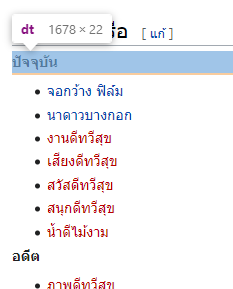

จากภาพข้างต้น จะเห็นได้ว่าหัวข้อของตารางที่เขียนว่า **ปัจจุบัน** นั้น อยู่ภายใน Tag `<dt>` (description term) ทีนี้เรามาดูกันว่า เราจะสามารถดึง Element นั้นออกมาใช้งานได้อย่างไรบ้าง ค่อยๆลอง uncomment แต่ละวิธีแล้วลองรันดู

In [6]:
# soup.find? 

print("1. soup.find('dt'):")
print(soup.find('dt'))

print("2. soup.dt:") # shorthand 
print(soup.dt) 

print("3. soup.find_all('dt'):")
print(soup.find_all('dt'))

print("4. soup('dt'):") # shorthand 
print(soup('dt')) 

print("5. soup.find_all('dt')[0]:")
print(soup.find_all('dt')[0])

1. soup.find('dt'):
<dt>ปัจจุบัน</dt>
2. soup.dt:
<dt>ปัจจุบัน</dt>
3. soup.find_all('dt'):
[<dt>ปัจจุบัน</dt>, <dt>อดีต</dt>, <dt>ผลิตในนามจีดีเอช</dt>, <dt>ผลิตในนามภาพดีทวีสุข (เฉพาะช่วงที่เป็นบริษัทในเครือจีดีเอช)</dt>, <dt>ผลิตในนามงานดีทวีสุข</dt>]
4. soup('dt'):
[<dt>ปัจจุบัน</dt>, <dt>อดีต</dt>, <dt>ผลิตในนามจีดีเอช</dt>, <dt>ผลิตในนามภาพดีทวีสุข (เฉพาะช่วงที่เป็นบริษัทในเครือจีดีเอช)</dt>, <dt>ผลิตในนามงานดีทวีสุข</dt>]
5. soup.find_all('dt')[0]:
<dt>ปัจจุบัน</dt>


เนื่องจากหัวข้อปัจจุบันอยู่ใน Tag `<dt>` อันแรกของเพจนั้น เราสามารถเรียกใช้ element ได้ด้วยคำสั่ง `soup.find('dt')` หรือ `soup.dt`
หรือหากเราอยากจะหา element `<dt>` ทั้งหมดก่อน แล้วค่อยเลือก element ที่เราต้องการ ก็ทำได้เช่นกัน แบบในตัวอย่างสุดท้าย

In [7]:
# ตัวอย่างการค้นหาชื่อบริษัท โดยเริ่มจากการหา tag <dt> แล้วค่อยเข้าไปหา tag <ul> จากนั้นหาทุก tag <li>

'''
ถ้าสังเกตดีๆจะพบว่ามี hierarchy ดังนี้ เป้าหมายของเราคือต้องการข้อมูลใน <li> ทั้งหมด

<dl>
    <dt>ปัจจุบัน</dt>
<dl>
<ul>
    <li>จอกว้างฟิลม์</li>
    <li>นาดาว บางกอก</li>
    <li>งานดีทวีสุข</li>
    <li>..........</li>
</ul>

'''

# เริ่มต้น การที่เราจะได้รายชื่อทั้งหมดมาได้ก็ต้องหาจุดเริ่มต้นของเรานั่นคือคำว่า "ปัจจุบัน"
# ซึ่งมี tag <dt> ครอบอยู่ดังนั้นเราจะหา <dt> กันก่อน

new_comp = soup.find('dt')
print(new_comp)

<dt>ปัจจุบัน</dt>


In [8]:
# หากดูใน hierarchy จะพบว่า <li> อยู่ภาพใต้ <ul> ซึ่ง <ul> อยู่ถัดไปจาก <dt> ที่เราเคยค้นหามาก่อนหน้านี้
# ดังนั้นเราสามารถค้นหา <ul> ที่อยู่ติดกันได้โดยใช้คำสั่ง find_next('ul') ดังตัวอย่างด้านล่าง

new_comp = soup.find('dt').find_next('ul')
print(new_comp)

# ดูที่ผลลัพธ์! เนื่องจาก <li> อยู่ภายใต้ <ul> เวลาเรา find <ul> เราจะได้ลูกหลานที่อยู่ภายใน tag นั้นติดมาด้วย
# ซึ่งก็คือได้ <li> ทั้งหมดติดมาด้วยนั่นเอง

<ul><li><a href="/wiki/%E0%B8%88%E0%B8%AD%E0%B8%81%E0%B8%A7%E0%B9%89%E0%B8%B2%E0%B8%87_%E0%B8%9F%E0%B8%B4%E0%B8%A5%E0%B9%8C%E0%B8%A1" title="จอกว้าง ฟิล์ม">จอกว้าง ฟิล์ม</a></li>
<li><a class="new" href="/w/index.php?title=%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B8%94%E0%B8%B5%E0%B8%97%E0%B8%A7%E0%B8%B5%E0%B8%AA%E0%B8%B8%E0%B8%82&amp;action=edit&amp;redlink=1" title="งานดีทวีสุข (ไม่มีหน้า)">งานดีทวีสุข</a></li>
<li><a class="new" href="/w/index.php?title=%E0%B9%80%E0%B8%AA%E0%B8%B5%E0%B8%A2%E0%B8%87%E0%B8%94%E0%B8%B5%E0%B8%97%E0%B8%A7%E0%B8%B5%E0%B8%AA%E0%B8%B8%E0%B8%82&amp;action=edit&amp;redlink=1" title="เสียงดีทวีสุข (ไม่มีหน้า)">เสียงดีทวีสุข</a></li>
<li><a class="new" href="/w/index.php?title=%E0%B8%AA%E0%B8%A7%E0%B8%B1%E0%B8%AA%E0%B8%94%E0%B8%B5%E0%B8%97%E0%B8%A7%E0%B8%B5%E0%B8%AA%E0%B8%B8%E0%B8%82&amp;action=edit&amp;redlink=1" title="สวัสดีทวีสุข (ไม่มีหน้า)">สวัสดีทวีสุข</a></li>
<li><a class="new" href="/w/index.php?title=%E0%B8%AA%E0%B8%99%E0%B8%B8%E0%B8%81%E0%B8%94%E0%B8%B5%E0%B8

In [9]:
# ในขั้นตอนนี้เราจะดึงข้อมูลจาก <li> ทั้งหมดออกมา หากเราใช้ find_next('li')เราจะได้แค่ <li> อันแรกออกมา
# ดังนั้นเราจะใช้ find_all('li') เพื่อให้ได้ทุก <li> ที่อยู่ภายใน <ul>

new_comp = soup.find('dt').find_next('ul').find_all('li')

# แสดงจำนวนข้อมูลภายใน list
print(f"Total length in list = {len(new_comp)}\n")

# ใช้ for loop เพื่อแสดงผลข้อมูลแต่ละตัวใน new_comp_list
for t in new_comp:
    print(t)
    print("\n")

Total length in list = 6

<li><a href="/wiki/%E0%B8%88%E0%B8%AD%E0%B8%81%E0%B8%A7%E0%B9%89%E0%B8%B2%E0%B8%87_%E0%B8%9F%E0%B8%B4%E0%B8%A5%E0%B9%8C%E0%B8%A1" title="จอกว้าง ฟิล์ม">จอกว้าง ฟิล์ม</a></li>


<li><a class="new" href="/w/index.php?title=%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B8%94%E0%B8%B5%E0%B8%97%E0%B8%A7%E0%B8%B5%E0%B8%AA%E0%B8%B8%E0%B8%82&amp;action=edit&amp;redlink=1" title="งานดีทวีสุข (ไม่มีหน้า)">งานดีทวีสุข</a></li>


<li><a class="new" href="/w/index.php?title=%E0%B9%80%E0%B8%AA%E0%B8%B5%E0%B8%A2%E0%B8%87%E0%B8%94%E0%B8%B5%E0%B8%97%E0%B8%A7%E0%B8%B5%E0%B8%AA%E0%B8%B8%E0%B8%82&amp;action=edit&amp;redlink=1" title="เสียงดีทวีสุข (ไม่มีหน้า)">เสียงดีทวีสุข</a></li>


<li><a class="new" href="/w/index.php?title=%E0%B8%AA%E0%B8%A7%E0%B8%B1%E0%B8%AA%E0%B8%94%E0%B8%B5%E0%B8%97%E0%B8%A7%E0%B8%B5%E0%B8%AA%E0%B8%B8%E0%B8%82&amp;action=edit&amp;redlink=1" title="สวัสดีทวีสุข (ไม่มีหน้า)">สวัสดีทวีสุข</a></li>


<li><a class="new" href="/w/index.php?title=%E0%B8%AA%E0%B8%99%E0%B8%B8%E0

In [10]:
# การเอาค่าออกมาจาก tag ก็ต้องดูว่าค่านั้นอยู่ภายใต้ tag ย่อยๆอะไร จากตัวอย่างก่อนหน้าสังเกตว่า 
# <li> <a> จอกว้าง ฟิล์ม </a> </li>
# สามารถแสดงผล text ได้ดังนี้

for t in new_comp:
    print(t.a.text)

จอกว้าง ฟิล์ม
งานดีทวีสุข
เสียงดีทวีสุข
สวัสดีทวีสุข
สนุกดีทวีสุข
น้ำดีไม้งาม


In [11]:
# เพิ่มเติม ควรอ่าน!!!
# จริงๆแล้ว ดูเหมือนว่า <li> จะอยู่ภายใต้ <ul> 
# ทำไมเราถึงไม่ for loop เพื่อวนเอาค่าใน li ออกมาหละ ทำไมต้อง find_all('li') ด้วย

new_comp = soup.find('dt').find_next('ul')
print(f"Total length in list = {len(new_comp)}\n")

# จากข้อก่อนหน้าถ้าเราใช้ find_all('li') จะได้ข้อมูลมาทั้งหมด 7 ตัวตามรายชื่อบริษัทที่แสดงในเว็บ
# แต่ถ้าเราใช้ for loop ดันมีข้อมูลทั้งหมด 13 ตัว นั่นเป็นเพราะว่ามันติดข้อมูล space ว่างๆออกมาด้วย [NavigableString](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigablestring)
# ซึ่งสามารถเกิดขึ้นได้ตอนเขียนเว็บ
# ดังนั้นต้องระวัง เรื่องนี้ให้ดีนะครับ !!!

for index, k in enumerate(new_comp):
    print(index)
    print(f"→{k}←{type(k)}")
    print("--------------------------------------------------------------------")

Total length in list = 11

0
→<li><a href="/wiki/%E0%B8%88%E0%B8%AD%E0%B8%81%E0%B8%A7%E0%B9%89%E0%B8%B2%E0%B8%87_%E0%B8%9F%E0%B8%B4%E0%B8%A5%E0%B9%8C%E0%B8%A1" title="จอกว้าง ฟิล์ม">จอกว้าง ฟิล์ม</a></li>←<class 'bs4.element.Tag'>
--------------------------------------------------------------------
1
→
←<class 'bs4.element.NavigableString'>
--------------------------------------------------------------------
2
→<li><a class="new" href="/w/index.php?title=%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B8%94%E0%B8%B5%E0%B8%97%E0%B8%A7%E0%B8%B5%E0%B8%AA%E0%B8%B8%E0%B8%82&amp;action=edit&amp;redlink=1" title="งานดีทวีสุข (ไม่มีหน้า)">งานดีทวีสุข</a></li>←<class 'bs4.element.Tag'>
--------------------------------------------------------------------
3
→
←<class 'bs4.element.NavigableString'>
--------------------------------------------------------------------
4
→<li><a class="new" href="/w/index.php?title=%E0%B9%80%E0%B8%AA%E0%B8%B5%E0%B8%A2%E0%B8%87%E0%B8%94%E0%B8%B5%E0%B8%97%E0%B8%A7%E0%B8%B5%E0%B8%AA%E0%

In [12]:
# วิธีแก้อีกแบบนึงคือใช้ try except แต่เอาง่ายๆก็คือกลับไปใช้ find_next() และ find_all()
# ไม่เชื่อลองเอา try, except ออกดูสิ ว่าจะเกิดอะไรขึ้น

for k in new_comp:
    try:
        print(k.a.text)
    except Exception as e: 
        pass

จอกว้าง ฟิล์ม
งานดีทวีสุข
เสียงดีทวีสุข
สวัสดีทวีสุข
สนุกดีทวีสุข
น้ำดีไม้งาม


#### แนะนำการใช้ try-except

try-except มีไว้เพื่อช่วยจัดการข้อผิดพลากที่อาจเกิดขึ้นได้ในคำสั่งของเรา เพราะว่าบางคำสั่งในโปรแกรมของเราอาจจะเกิดข้อผิดพลาดและทำให้โปรแกรมหยุดทำงานกะทันหันได้ ดังนั้นทางที่ดีเราควรที่จะเพื่อจัดการข้อผิดพลาดที่อาจจะเกิดขึ้น โดยโปรแกรมจะทดลองทำตามคำสั่งใน try ก่อนหากไม่มี error เกิดขึ้นก็จะทำงานในคำสั่งถัดไป แต่ถ้าหากว่ามีข้อผิดพลาดเกิดขึ้นโปรแกรมจะไปทำงานในคำสั่ง except แทนโดยเราสามารถกำหนดวิธีการในการจัดการกับ error ในแต่ละประเภทได้

เพิ้มเติม: [https://www.w3schools.com/python/python_try_except.asp](https://www.w3schools.com/python/python_try_except.asp)

In [13]:
# ----- TO DO 1.2 -----
# ลองดึงบริษัทในเครือ (อดีต) มาแสดงผลให้หน่อย
# ง่ายจะตาย :)
new_comp = soup.find('dt').find_next('dt').find_next('ul').find_all('li')
for name in new_comp:
    print(name.a.text)

######################################

ภาพดีทวีสุข
เดอะ ซีเคร็ต ฟาร์ม
กู๊ดธิงแฮพเพ่น
นาดาวบางกอก


ต้องได้คำตอบแบบนี้ถึงจะถูก 

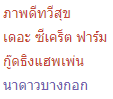

## Social media - GDH

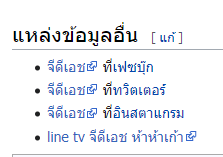

ในขั้นตอนนี้เราจะลองดึงข้อมูล social media จากเพจ GDH ใน wikipedia

In [14]:
# ----- TO DO 1.3 -----
# จงหา link ของ social media [facebook, twitter, instagram, tv.line] มาแสดงผล
# มี code มาให้แล้ว ช่วยเติมสิ่งที่ขาดหายไปหน่อย
# Hint : หาจากคำว่า "แหล่งข้อมูลอื่น"

social_media = soup.find_all('span', string = 'แหล่งข้อมูลอื่น')

print(social_media)

[<span class="mw-headline" id="แหล่งข้อมูลอื่น">แหล่งข้อมูลอื่น</span>]


In [15]:
# เนื่องจากเรา find_all (เพราะว่าแหล่งข้อมูลอื่นปรากฏอยู่หลายที่ในเว็บไซต์ ทำให้เราต้องเลือกว่าจะใช้อันไหน)
# เติม index ที่ถูกต้องให้หน่อย

sm_ul = social_media[0]
print(sm_ul)

<span class="mw-headline" id="แหล่งข้อมูลอื่น">แหล่งข้อมูลอื่น</span>


In [16]:
'''
<h2>
    <span>แหล่งข้อมูลอื่น</span>
</h2>
<ul>
    <li>....เฟสบุ๊ก</li>
    <li>....ทวิตเตอร์</li>
    <li>....อินสตาแกรม</li>
    <li>....line tv</li>
</ul>
'''

# หาก inspect ดูจะพบว่าหากเราค้นหาด้วย <span> เราจะอยู่ภายใต้ <h2> 
# ดังนั้นหากต้องการไปยัง <ul> เราควรที่จะต้องถอยกลับมาที่ <h2> ก่อนแล้วถึงค่อยไปหา <ul>
# เราสามารถถอยกลับมาได้โดยใช้คำสั่ง .parent เพื่อหลับไปยัง <h2> จากนั้นใช้ find_next_sibling() เพื่อไปยัง tab ถัดไป

for li in sm_ul.parent.find_next_sibling():
    try:
        print(li.a['href'])
    except:
        continue

https://www.facebook.com/GDH559
https://twitter.com/GDH559
http://www.instagram.com/GDH559
https://tv.line.me/gdh559


## นักแสดงนาดาวบางกอก

ได้เวลาทดสอบความสามารถกันแล้ว! ลองเขียนโค้ดเพื่อดึงรายชื่อนักแสดงในสังกัดนาดาวบางกอก จากวิกิพีเดียกันดู โดยเอาเฉพาะ **ศิลปินในสังกัดปัจจุบันอยู่ระหว่างดำเนินการเปลี่ยนต้นสังกัดหรือเปลี่ยนเป็นศิลปินอิสระ**

<img src = 'https://drive.google.com/uc?id=10lOyHZGt0fN5D1g_g9-n_hdvVZmklkHG'>

In [17]:
# เปลี่ยนหน้าเว็บที่เราจะ scrape

page2 = 'นาดาวบางกอก'
url2 = 'http://th.wikipedia.org/wiki/' + urllib.parse.quote(page2)
html2 = urllib.request.urlopen(url2).read()
soup2 = BeautifulSoup(html2, 'html.parser')

In [18]:
# ----- TO DO 2 -----
# ดึงรายชื่อนักแสดงนาดาวบางกอกมาแสดงผล
# Hint : อาจต้อง find_next_sibling มากกว่า 1 ครั้ง ลอง inspect ดูดีๆ

artists_div = soup2.find('span', string = 'ศิลปินในสังกัดปัจจุบันอยู่ระหว่างดำเนินการเปลี่ยนต้นสังกัดหรือเปลี่ยนเป็นศิลปินอิสระ').parent.find_next_sibling().find_next_sibling().find_next_sibling()
artists_list = artists_div.find_all('li')
# print(artists_list)

for li in artists_list:
    try:
        print(li.a.text)
    except:
        continue







######################################

ซันนี่ สุวรรณเมธานนท์
ฉันทวิชช์ ธนะเสวี
ธนภพ ลีรัตนขจร
โอบนิธิ วิวรรธนวรางค์
เสฎฐวุฒิ อนุสิทธิ์
กันต์ ชุณหวัตร
วงศ์รวี นทีธร
ธิติ มหาโยธารักษ์
ชลธร คงยิ่งยง
พาริส อินทรโกมาลย์สุต
พุฒิพงศ์ อัสสรัตนกุล
กฤษฏ์ อำนวยเดชกร
สาริษฐ์ ตรัยเลิศวิเชียร
ต้นหน ตันติเวชกุล
จิรายุส ขาวใบไม้
สุวิกรม อัมระนันทน์
ณภัทร โชคจินดาชัย
กณิศ วิเชียรวนิชกุล
กานดิศ วรรณอรุณ
แดน พฤกษ์พยุง
ปณชัย ศรีอาริยะรุ่งเรือง
อิงครัต ดำรงค์ศักดิ์กุล
พลวิชญ์ เกตุประภากร
ปองพล ปัญญามิตร
นรีกุล เกตุประภากร
เขมิศรา พลเดช
นฤภรกมล ฉายแสง
ศวรรยา ไพศาลพยัคฆ์


# Section 3 : ดึงข้อมูลจากตาราง

### ผลงานละครโทรทัศน์ของ GDH

ในแบบฝึกหัดต่อไป เราจะมาทำการดึงข้อมูลละครโทรทัศน์ของ GDH จากหน้าวิกิพีเดียกัน ว่าหนังแต่ละเรื่องออกอากาศเมื่อไหร่ ออกที่ช่องไหนและบริษัทที่ร่วมผลิตคือบริษัทใด

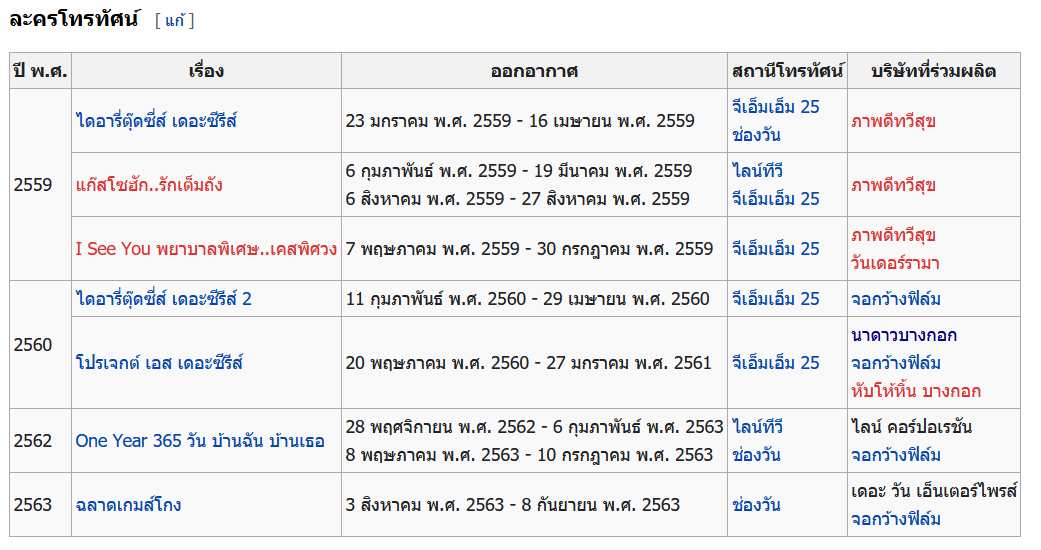

In [19]:
drama_tag = soup.find_all('span', string='ละครโทรทัศน์')
print(drama_tag)

[<span class="mw-headline" id="ละครโทรทัศน์">ละครโทรทัศน์</span>]



<img src="https://github.com/Mixelon-tera/WebScraping-2/raw/master/source/span_drama.png" width="600" align="left">

In [20]:
table = soup.find_all('span', string='ละครโทรทัศน์')[0].find_next('table')
print(table)

<table class="wikitable">
<tbody><tr>
<th>ปี พ.ศ.</th>
<th>เรื่อง</th>
<th>ออกอากาศ</th>
<th>สถานีโทรทัศน์</th>
<th>บริษัทที่ร่วมผลิต
</th></tr>
<tr>
<td rowspan="3">2559</td>
<td><a class="mw-redirect" href="/wiki/%E0%B9%84%E0%B8%94%E0%B8%AD%E0%B8%B2%E0%B8%A3%E0%B8%B5%E0%B9%88%E0%B8%95%E0%B8%B8%E0%B9%8A%E0%B8%94%E0%B8%8B%E0%B8%B5%E0%B9%88%E0%B8%AA%E0%B9%8C_%E0%B9%80%E0%B8%94%E0%B8%AD%E0%B8%B0%E0%B8%8B%E0%B8%B5%E0%B8%A3%E0%B8%B5%E0%B8%AA%E0%B9%8C" title="ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์">ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์</a></td>
<td>23 มกราคม พ.ศ. 2559 - 16 เมษายน พ.ศ. 2559<br/>6 กันยายน พ.ศ. 2562 - 18 ตุลาคม พ.ศ. 2562</td>
<td><a href="/wiki/%E0%B8%88%E0%B8%B5%E0%B9%80%E0%B8%AD%E0%B9%87%E0%B8%A1%E0%B9%80%E0%B8%AD%E0%B9%87%E0%B8%A1_25" title="จีเอ็มเอ็ม 25">จีเอ็มเอ็ม 25</a><br/><a class="mw-redirect" href="/wiki/%E0%B8%8A%E0%B9%88%E0%B8%AD%E0%B8%87%E0%B8%A7%E0%B8%B1%E0%B8%99_31" title="ช่องวัน 31">ช่องวัน 31</a>
</td>
<td><a class="new" href="/w/index.php?title=%E0%B8%A0%E0%B8%B2%E0%B8%9E%E0%B8

ปัญหาอย่างหนึ่งของตารางนี้ คือการใช้คำสั่ง `rowspan` ทำให้แต่ละแถว `<tr>` ในตาราง อาจะมีจำนวนคอลัมน์ `<td>` ไม่เท่ากัน ส่งผลให้ชื่อหนัง อาจจะอยู่ในคอลัมน์ที่ 0 หรือ 1 ก็ได้ ขึ้นอยู่กับว่าแถวนั้นเป็นแถวแรกของปีนั้นๆหรือไม่ 

<img src="https://github.com/Mixelon-tera/WebScraping-2/raw/master/source/rowspan.png" width=300 >

เพื่อความง่าย เราจะไม่สนใจปีที่หนังเข้าฉายกันไปก่อน และลบ `<td>` ทุกอันที่มีการระบุค่า `rowspan` ด้วยฟังก์ชัน `extract()` เนื่องจากเดี๋ยวเราจะกลับมาใช้ตารางเต็มๆกันอีกครั้ง เราจึงต้องสร้างอีก copy `table` ไว้ก่อน 


In [21]:
simplified_table = copy.copy(table) # จะเกิดอะไรขึ้นถ้าเราใช้ `simplified_table = table` ? 
for td in simplified_table('td', {'rowspan': True}):
    td.extract() # ลบ element จาก DOM tree

print(urllib.parse.unquote(str(simplified_table)))

<table class="wikitable">
<tbody><tr>
<th>ปี พ.ศ.</th>
<th>เรื่อง</th>
<th>ออกอากาศ</th>
<th>สถานีโทรทัศน์</th>
<th>บริษัทที่ร่วมผลิต
</th></tr>
<tr>

<td><a class="mw-redirect" href="/wiki/ไดอารี่ตุ๊ดซี่ส์_เดอะซีรีส์" title="ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์">ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์</a></td>
<td>23 มกราคม พ.ศ. 2559 - 16 เมษายน พ.ศ. 2559<br/>6 กันยายน พ.ศ. 2562 - 18 ตุลาคม พ.ศ. 2562</td>
<td><a href="/wiki/จีเอ็มเอ็ม_25" title="จีเอ็มเอ็ม 25">จีเอ็มเอ็ม 25</a><br/><a class="mw-redirect" href="/wiki/ช่องวัน_31" title="ช่องวัน 31">ช่องวัน 31</a>
</td>
<td><a class="new" href="/w/index.php?title=ภาพดีทวีสุข&amp;action=edit&amp;redlink=1" title="ภาพดีทวีสุข (ไม่มีหน้า)">ภาพดีทวีสุข</a>
</td></tr>
<tr>
<td><a class="new" href="/w/index.php?title=แก๊สโซฮัก..รักเต็มถัง&amp;action=edit&amp;redlink=1" title="แก๊สโซฮัก..รักเต็มถัง (ไม่มีหน้า)">แก๊สโซฮัก..รักเต็มถัง</a></td>
<td>6 กุมภาพันธ์ พ.ศ. 2559 - 19 มีนาคม พ.ศ. 2559<br/>6 สิงหาคม พ.ศ. 2559 - 27 สิงหาคม พ.ศ. 2559
</td>
<td><a href="/wiki/ไลน์

จะเห็นได้ว่า ตอนนี้ทุกแถวมี `<td>` สามอัน เท่ากันหมดแล้ว ("ปี พ.ศ." หายไปแล้ว) ทีนี้เราก็สามารถดึงข้อมูลออกมาได้ง่ายๆตามนี้

In [22]:
for tr in simplified_table('tr'):
    cells = tr('td')
    if len(cells):  # ทำไมต้องมีบรรทัดนี้ ?
        # ใช้ .strip() เพื่อตัด space ว่างและ \n ทิ้ง ตอนแสดงผลจะได้สวยงาม
        print('"%s", "%s", "%s", "%s"' % (cells[0].text.strip(), cells[1].text.strip(), cells[2].text.strip(), cells[3].text.strip()))

"ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์", "23 มกราคม พ.ศ. 2559 - 16 เมษายน พ.ศ. 25596 กันยายน พ.ศ. 2562 - 18 ตุลาคม พ.ศ. 2562", "จีเอ็มเอ็ม 25ช่องวัน 31", "ภาพดีทวีสุข"
"แก๊สโซฮัก..รักเต็มถัง", "6 กุมภาพันธ์ พ.ศ. 2559 - 19 มีนาคม พ.ศ. 25596 สิงหาคม พ.ศ. 2559 - 27 สิงหาคม พ.ศ. 2559", "ไลน์ทีวีจีเอ็มเอ็ม 25", "ภาพดีทวีสุข"
"I See You พยาบาลพิเศษ..เคสพิศวง", "7 พฤษภาคม พ.ศ. 2559 - 30 กรกฎาคม พ.ศ. 2559", "จีเอ็มเอ็ม 25", "ภาพดีทวีสุขวันเดอร์รามา"
"ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์ 2", "11 กุมภาพันธ์ พ.ศ. 2560 - 29 เมษายน พ.ศ. 256018 ตุลาคม พ.ศ. 2562 - 29 พฤศจิกายน พ.ศ. 2562", "จีเอ็มเอ็ม 25ช่องวัน 31", "จอกว้างฟิล์ม"
"โปรเจกต์ เอส เดอะซีรีส์", "20 พฤษภาคม พ.ศ. 2560 - 27 มกราคม พ.ศ. 2561", "จีเอ็มเอ็ม 25", "นาดาวบางกอกจอกว้างฟิล์มหับโห้หิ้น บางกอก"
"2562", "One Year 365 วัน บ้านฉัน บ้านเธอ", "28 พฤศจิกายน พ.ศ. 2562 - 6 กุมภาพันธ์ พ.ศ. 25638 พฤษภาคม พ.ศ. 2563 - 10 กรกฎาคม พ.ศ. 2563", "ไลน์ทีวีช่องวัน 31"
"2563", "ฉลาดเกมส์โกง", "3 สิงหาคม พ.ศ. 2563 - 8 กันยายน พ.ศ. 2563", "ช่องวัน 31"


สำหรับคนที่อยากรู้ว่า ถ้าจะเอาข้อมูลปีที่เข้าฉายมาใช้ด้วย เราจะทำได้อย่างไร ลองพยายามทำความเข้าใจโค้ดข้างล่างนี้ดู

In [23]:
# copy ข้อมูล table ไว้เพื่อที่จะได้ไม่ต้องเก็บใหม่ ในกรณีที่ข้อมูลถูกแก้ไขหรือเสียหายก็สามารถดึงข้อมูลจากต้นฉบับได้เลย
dup_table = copy.copy(table)

rows = dup_table('tr')
header = rows[0]
n_cols = len(header('th'))

current_year = None
movies = []

# วน loop ทุกๆ row
for tr in rows[1:]:
    movie = {}
    
    # เลือกทุก column ในแถวนั้น จะได้ [ปี พ.ศ., เรื่อง, ออกอากาศ, สถานีโทรทัศน์, บริษัทท่ร่วมผลิต]
    cells = tr('td')

    # ถ้า column ในแถวนั้นมี attribute 'rowspan' ให้เก็บ text นั้นไว้ใน current_year
    if cells[0].has_attr('rowspan'):
        current_year = tr.td.text.strip() 
        # แล้วตัด ปี พ.ศ. ออกจากตาราง เหลือ [เรื่อง, ออกอากาศ, สถานีโทรทัศน์, บริษัทท่ร่วมผลิต] 
        cells = cells[1:]
        
    # ปี 2562 กับ 2563 ไม่ได้มี tag rowspan ทำให้ปีพ.ศ. ไม่ถูกตัดออกไป เราเลยต้องเก็บปีพ.ศ.ไว้
    # จากนั้นจึงค่อยตัดทิ้ง [หากไม่เข้าใจลองเอาออกดูสิ]
    if len(cells) == 5:
        current_year = cells[0].text
        cells = cells[1:]
        
    movie['year'] = current_year
    movie['name'] = cells[0].text.strip()
    movie['on air'] = '%s %s' % (cells[1].text, cells[2].text)
    movie['co-company'] = cells[3].text
    if cells[0].a is not None:
        # ต้องแปลงจากภาษาไทยให้เป็น encode-string
        movie['url'] = urllib.parse.unquote(cells[0].a['href'])
    else:
        movie['url'] = '-'
    movies.append(movie)


for m in movies:
    print(m)
    print("\n")


{'year': '2559', 'name': 'ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์', 'on air': '23 มกราคม พ.ศ. 2559 - 16 เมษายน พ.ศ. 25596 กันยายน พ.ศ. 2562 - 18 ตุลาคม พ.ศ. 2562 จีเอ็มเอ็ม 25ช่องวัน 31\n', 'co-company': 'ภาพดีทวีสุข\n', 'url': '/wiki/ไดอารี่ตุ๊ดซี่ส์_เดอะซีรีส์'}


{'year': '2559', 'name': 'แก๊สโซฮัก..รักเต็มถัง', 'on air': '6 กุมภาพันธ์ พ.ศ. 2559 - 19 มีนาคม พ.ศ. 25596 สิงหาคม พ.ศ. 2559 - 27 สิงหาคม พ.ศ. 2559\n ไลน์ทีวีจีเอ็มเอ็ม 25', 'co-company': 'ภาพดีทวีสุข\n', 'url': '/w/index.php?title=แก๊สโซฮัก..รักเต็มถัง&action=edit&redlink=1'}


{'year': '2559', 'name': 'I See You พยาบาลพิเศษ..เคสพิศวง', 'on air': '7 พฤษภาคม พ.ศ. 2559 - 30 กรกฎาคม พ.ศ. 2559 จีเอ็มเอ็ม 25', 'co-company': 'ภาพดีทวีสุขวันเดอร์รามา\n', 'url': '/w/index.php?title=I_See_You_พยาบาลพิเศษ..เคสพิศวง&action=edit&redlink=1'}


{'year': '2560', 'name': 'ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์ 2', 'on air': '11 กุมภาพันธ์ พ.ศ. 2560 - 29 เมษายน พ.ศ. 256018 ตุลาคม พ.ศ. 2562 - 29 พฤศจิกายน พ.ศ. 2562\n จีเอ็มเอ็ม 25ช่องวัน 31\n', 'co-company': 'จอก

ถึงตอนนี้ทุกคนอาจจะสงสัยว่า ทำไมเราต้องเขียนโค้ดให้มันวุ่นวายขนาดนี้ แค่ copy/paste แป๊ปเดียวก็เสร็จแล้ว

ถูกต้อง! และ Data scientist ที่ดีก็ควรจะเลือกใช้วิธีที่ช่วยให้เราทำงานได้เร็วที่สุด 

แต่...ตัวอย่างข้างต้นนั้น เป็นเพียงตัวอย่างง่ายๆเท่านั้น ในตัวอย่างถัดไป เราจะมาดึงข้อมูลว่าหนังแต่ละเรื่องใครกำกับ ซึ่งข้อมูลนี้ไม่ได้ให้มาในตาราง แต่เราสามารถหาได้ในหน้าวิกิของหนังแต่ละเรื่อง 

In [24]:
# โค๊ดคล้ายเดิมกับ block ก่อนหน้านี้เลย ต่างกันแค่เอา urllib.parse.unquote ออก 
# เราเอากลับมาเป็น % encode เหมือนเดิมเพราะภาษาไทยใช้ในการแสดงผลเท่านั้น
# ไม่สามารถนำ url ที่มีภาษาไทยต่อท้ายมา crawl data ได้

movies = []

for tr in rows[1:]:
    movie = {}
    cells = tr('td')
    if cells[0].has_attr('rowspan'):
        current_year = tr.td.text
        cells = cells[1:]
    if len(cells) == 5:
        current_year = cells[0].text
        cells = cells[1:]
    movie['year'] = current_year
    movie['name'] = cells[0].text.strip()
    movie['on air'] = '%s %s' % (cells[1].text, cells[2].text)
    movie['co-company'] = cells[3].text
    if cells[0].a is not None:
        # ครั้งนี้ไม่ต้อง unquote string แล้วในการนำไปใช้เราต้องใช้แบบ encode-string
        movie['url'] = cells[0].a['href']
    else:
        movie['url'] = '-'
    movies.append(movie)
    
print(movies)

[{'year': '2559', 'name': 'ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์', 'on air': '23 มกราคม พ.ศ. 2559 - 16 เมษายน พ.ศ. 25596 กันยายน พ.ศ. 2562 - 18 ตุลาคม พ.ศ. 2562 จีเอ็มเอ็ม 25ช่องวัน 31\n', 'co-company': 'ภาพดีทวีสุข\n', 'url': '/wiki/%E0%B9%84%E0%B8%94%E0%B8%AD%E0%B8%B2%E0%B8%A3%E0%B8%B5%E0%B9%88%E0%B8%95%E0%B8%B8%E0%B9%8A%E0%B8%94%E0%B8%8B%E0%B8%B5%E0%B9%88%E0%B8%AA%E0%B9%8C_%E0%B9%80%E0%B8%94%E0%B8%AD%E0%B8%B0%E0%B8%8B%E0%B8%B5%E0%B8%A3%E0%B8%B5%E0%B8%AA%E0%B9%8C'}, {'year': '2559', 'name': 'แก๊สโซฮัก..รักเต็มถัง', 'on air': '6 กุมภาพันธ์ พ.ศ. 2559 - 19 มีนาคม พ.ศ. 25596 สิงหาคม พ.ศ. 2559 - 27 สิงหาคม พ.ศ. 2559\n ไลน์ทีวีจีเอ็มเอ็ม 25', 'co-company': 'ภาพดีทวีสุข\n', 'url': '/w/index.php?title=%E0%B9%81%E0%B8%81%E0%B9%8A%E0%B8%AA%E0%B9%82%E0%B8%8B%E0%B8%AE%E0%B8%B1%E0%B8%81..%E0%B8%A3%E0%B8%B1%E0%B8%81%E0%B9%80%E0%B8%95%E0%B9%87%E0%B8%A1%E0%B8%96%E0%B8%B1%E0%B8%87&action=edit&redlink=1'}, {'year': '2559', 'name': 'I See You พยาบาลพิเศษ..เคสพิศวง', 'on air': '7 พฤษภาคม พ.ศ. 2559 - 30 กรกฎาคม พ.

In [25]:
for movie in movies:
    print('Processing ' + movie['name'] + '...')

    movie_html = urllib.request.urlopen('http://th.wikipedia.com' + movie['url'])
    movie_soup = BeautifulSoup(movie_html, 'html.parser')
    try:
        direct_td = movie_soup.find('th', text='กำกับโดย').find_next()
        movie['directors'] = [x.text for x in direct_td('a')] # list comprehension
    except:
        movie['directors'] = 'unknown'
    
    # มารยาทในการดึงข้อมูลเราควรที่จะต้องใส่ sleep เพื่อไม่ให้ server ทำงานหนักเกินไป
    sleep(1) 

Processing ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์...
Processing แก๊สโซฮัก..รักเต็มถัง...
Processing I See You พยาบาลพิเศษ..เคสพิศวง...
Processing ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์ 2...
Processing โปรเจกต์ เอส เดอะซีรีส์...
Processing One Year 365 วัน บ้านฉัน บ้านเธอ...
Processing ฉลาดเกมส์โกง...


In [26]:
# แสดงผลรายชื่อผู้กำกับของหนังแต่ละเรื่อง (ถ้ามี)
for m in movies:
    print("%s \t\t %s" % (m['name'], m['directors']))

ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์ 		 ['ปิยะชาติ ทองอ่วม', 'พัฒน์ บุญนิธิพัฒน์']
แก๊สโซฮัก..รักเต็มถัง 		 unknown
I See You พยาบาลพิเศษ..เคสพิศวง 		 unknown
ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์ 2 		 ['ปิยะชาติ ทองอ่วม', 'พัฒน์ บุญนิธิพัฒน์']
โปรเจกต์ เอส เดอะซีรีส์ 		 ['พิชย จรัสบุญประชา', 'นฤเบศ กูโน', 'พัฒน์ บุญนิธิพัฒน์', 'ธนีดา หาญทวีวัฒนา']
One Year 365 วัน บ้านฉัน บ้านเธอ 		 []
ฉลาดเกมส์โกง 		 unknown


# Section 4: Assignment

### Assignment : ผลงานภาพยนตร์ของ GDH

ในแบบฝึกหัดต่อไป เราจะมาทำการดึงข้อมูลภาพยนตร์ของ GDH จากหน้าวิกิพีเดียกัน ว่าหนังแต่ละเรื่องเข้าฉายเมื่อไหร่ ทำรายได้ไปมากน้อยแค่ไหน และใครเป็นผู้กำกับ

*** ความยากของตารางนี้คือมี rowspan มากกว่า 1 column ทำให้ต้องคิดนิดนึงว่าจะรับมือกับปัญหานี้อย่างไรดี ***

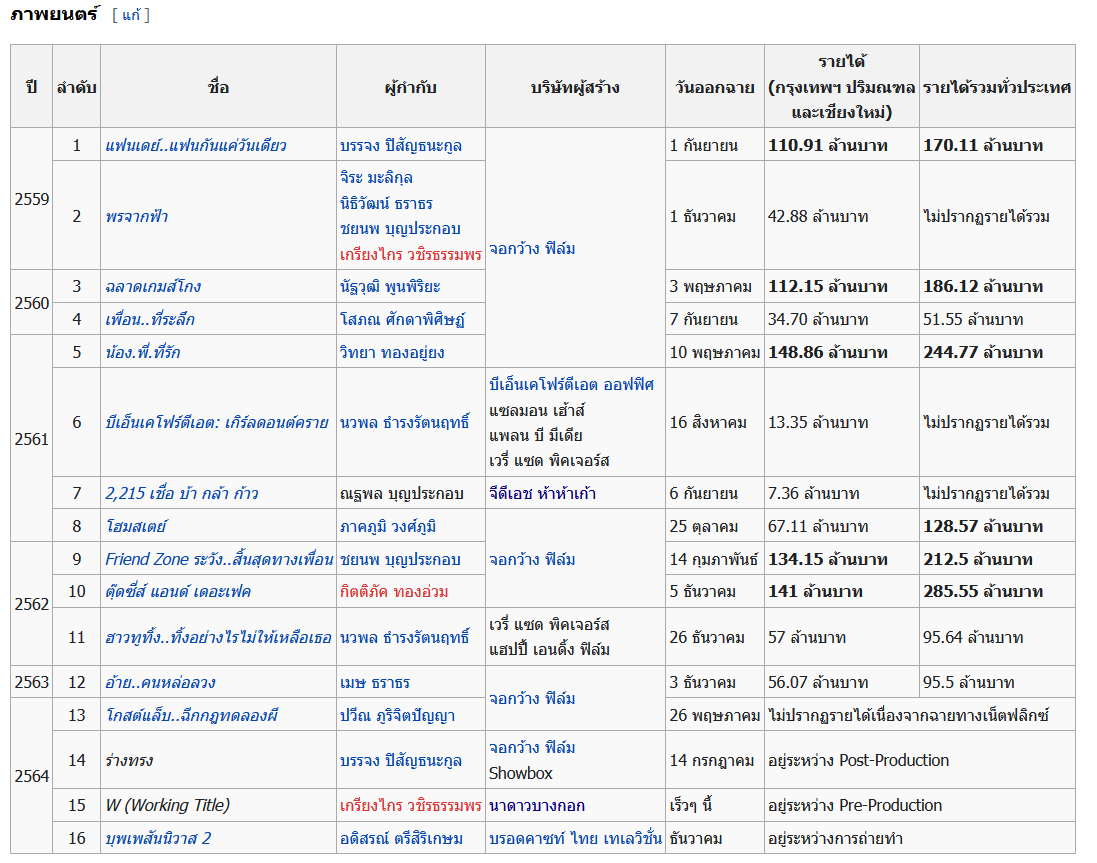

เช่นเคย เรามาเริ่มต้นจากการหา `<table>` ที่เราต้องการกันก่อน

In [27]:
# 4.1.1 : ค้นหาตารางที่เก็บข้อมูลภาพยนตร์

table2 = soup.find('span', string='ภาพยนตร์').find_next('table')


print(str(table2)[:1000])

<table class="wikitable">
<tbody><tr bgcolor="#CCCCCC">
<th>ปี</th>
<th>ลำดับ</th>
<th>ชื่อ</th>
<th>ผู้กำกับ</th>
<th>บริษัทผู้สร้าง</th>
<th>วันออกฉาย</th>
<th>รายได้<br/>(กรุงเทพฯ ปริมณฑล<br/>และเชียงใหม่)</th>
<th>รายได้รวมทั่วประเทศ
</th></tr>
<tr>
<td rowspan="2">2559
</td>
<td align="center">1
</td>
<td><i><a href="/wiki/%E0%B9%81%E0%B8%9F%E0%B8%99%E0%B9%80%E0%B8%94%E0%B8%A2%E0%B9%8C..%E0%B9%81%E0%B8%9F%E0%B8%99%E0%B8%81%E0%B8%B1%E0%B8%99%E0%B9%81%E0%B8%84%E0%B9%88%E0%B8%A7%E0%B8%B1%E0%B8%99%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A7" title="แฟนเดย์..แฟนกันแค่วันเดียว">แฟนเดย์..แฟนกันแค่วันเดียว</a></i>
</td>
<td><a href="/wiki/%E0%B8%9A%E0%B8%A3%E0%B8%A3%E0%B8%88%E0%B8%87_%E0%B8%9B%E0%B8%B4%E0%B8%AA%E0%B8%B1%E0%B8%8D%E0%B8%98%E0%B8%99%E0%B8%B0%E0%B8%81%E0%B8%B9%E0%B8%A5" title="บรรจง ปิสัญธนะกูล">บรรจง ปิสัญธนะกูล</a>
</td>
<td><a href="/wiki/%E0%B8%88%E0%B8%AD%E0%B8%81%E0%B8%A7%E0%B9%89%E0%B8%B2%E0%B8%87_%E0%B8%9F%E0%B8%B4%E0%B8%A5%E0%B9%8C%E0%B8%A1" title="จอกว้าง ฟิล์ม">จอ

In [28]:
# 4.1.2 : copyตาราง และ extract 'rowspan' ทิ้ง 

simplified_table2 = copy.copy(table2) # จะเกิดอะไรขึ้นถ้าเราใช้ `simplified_table = table` ? 
for td in simplified_table2('td', {'rowspan': True}):
    td.extract() # ลบ element จาก DOM tree

print(simplified_table2)


<table class="wikitable">
<tbody><tr bgcolor="#CCCCCC">
<th>ปี</th>
<th>ลำดับ</th>
<th>ชื่อ</th>
<th>ผู้กำกับ</th>
<th>บริษัทผู้สร้าง</th>
<th>วันออกฉาย</th>
<th>รายได้<br/>(กรุงเทพฯ ปริมณฑล<br/>และเชียงใหม่)</th>
<th>รายได้รวมทั่วประเทศ
</th></tr>
<tr>

<td align="center">1
</td>
<td><i><a href="/wiki/%E0%B9%81%E0%B8%9F%E0%B8%99%E0%B9%80%E0%B8%94%E0%B8%A2%E0%B9%8C..%E0%B9%81%E0%B8%9F%E0%B8%99%E0%B8%81%E0%B8%B1%E0%B8%99%E0%B9%81%E0%B8%84%E0%B9%88%E0%B8%A7%E0%B8%B1%E0%B8%99%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A7" title="แฟนเดย์..แฟนกันแค่วันเดียว">แฟนเดย์..แฟนกันแค่วันเดียว</a></i>
</td>
<td><a href="/wiki/%E0%B8%9A%E0%B8%A3%E0%B8%A3%E0%B8%88%E0%B8%87_%E0%B8%9B%E0%B8%B4%E0%B8%AA%E0%B8%B1%E0%B8%8D%E0%B8%98%E0%B8%99%E0%B8%B0%E0%B8%81%E0%B8%B9%E0%B8%A5" title="บรรจง ปิสัญธนะกูล">บรรจง ปิสัญธนะกูล</a>
</td>
<td><a href="/wiki/%E0%B8%88%E0%B8%AD%E0%B8%81%E0%B8%A7%E0%B9%89%E0%B8%B2%E0%B8%87_%E0%B8%9F%E0%B8%B4%E0%B8%A5%E0%B9%8C%E0%B8%A1" title="จอกว้าง ฟิล์ม">จอกว้าง ฟิล์ม</a>
</td>
<td>

In [29]:
# 4.1.3 : แสดงข้อมูลหลังจากที่ extract 'rowspan' ทิ้งไปแล้ว
# สังเกตได้ว่า บาง row มีข้อมูล 3 elements บาง row มี 4 elements หรือมากกว่าขึ้นกับว่า แถวนั้นโดน extract 'rowspan' ไปหรือไม่
# *** Block นี้ไม่ต้องเติมอะไร * **

for tr in simplified_table2('tr'):
    cells = tr('td')
    if len(cells): 
        try:
            print('"%s", "%s", "%s", "%s"' % (cells[0].text, cells[1].text, cells[2].text, cells[3].text))
            print()
        except:
            print('"%s", "%s", "%s"' % (cells[0].text, cells[1].text, cells[2].text))
            print()

"1
", "แฟนเดย์..แฟนกันแค่วันเดียว
", "บรรจง ปิสัญธนะกูล
", "จอกว้าง ฟิล์ม
"

"2
", "พรจากฟ้า
", "จิระ มะลิกุลนิธิวัฒน์ ธราธรชยนพ บุญประกอบเกรียงไกร วชิรธรรมพร
", "จอกว้าง ฟิล์มสิงห์ คอร์ปอเรชั่น
"

"3
", "ฉลาดเกมส์โกง
", "นัฐวุฒิ พูนพิริยะ
", "3 พฤษภาคม
"

"4
", "เพื่อน..ที่ระลึก
", "โสภณ ศักดาพิศิษฏ์
", "7 กันยายน
"

"5
", "น้อง.พี่.ที่รัก
", "วิทยา ทองอยู่ยง
", "10 พฤษภาคม
"

"6
", "บีเอ็นเคโฟร์ตีเอต: เกิร์ลดอนต์คราย
", "นวพล ธำรงรัตนฤทธิ์
", "บีเอ็นเคโฟร์ตีเอต ออฟฟิศแซลมอน เฮ้าส์แพลน บี มีเดียเวรี่ แซด พิคเจอร์ส
"

"7
", "2,215 เชื่อ บ้า กล้า ก้าว
", "ณฐพล บุญประกอบ
", "จีดีเอช ห้าห้าเก้าก้าวคนละก้าวคิง เพาเวอร์
"

"8
", "โฮมสเตย์
", "ภาคภูมิ วงศ์ภูมิ
", "25 ตุลาคม
"

"9
", "Friend Zone ระวัง..สิ้นสุดทางเพื่อน
", "ชยนพ บุญประกอบ
", "14 กุมภาพันธ์
"

"10
", "ตุ๊ดซี่ส์ แอนด์ เดอะเฟค
", "กิตติภัค ทองอ่วม
", "5 ธันวาคม
"

"11
", "ฮาวทูทิ้ง..ทิ้งอย่างไรไม่ให้เหลือเธอ
", "นวพล ธำรงรัตนฤทธิ์
", "เวรี่ แซด พิคเจอร์สแฮปปี้ เอนดิ้ง ฟิล์ม
"

"2563
", "12
", "อ้าย..คนหล่อลวง
", "เมษ ธราธร
"

"1

สำหรับคนที่อยากรู้ว่า ถ้าจะเอาข้อมูลปีที่เข้าฉายมาใช้ด้วย เราจะทำได้อย่างไร ลองพยายามทำความเข้าใจโค้ดข้างล่างนี้ดู

In [30]:
# 4.1.4 : copy ข้อมูล table ไว้เพื่อที่จะได้ไม่ต้องเก็บใหม่ ในกรณีที่ข้อมูลถูกแก้ไขหรือเสียหายก็สามารถดึงข้อมูลจากต้นฉบับได้เลย
# code ที่ให้มาเป็นเพียง code ตัวอย่าง ไม่จำเป็นต้องใช้ตามนี้ก็ได้ จะเขียนใหม่เองทั้งหมดก็ได้

dup_table2 = copy.copy(table2)

rows = dup_table2('tr')
header = ['year', 'order', 'name', 'director', 'company', 'release']
rows = rows[1:]

current_year = None
company = None
movies = []
for i in range(len(rows)):
    movies.append({})
# movies = [{} for i in range(len(rows))]

for row_index in range(len(rows)):
    header_index = 0
    for cell in rows[row_index]('td'):
        while header_index < 6 and header[header_index] in movies[row_index]:
            header_index += 1
        if header_index >= 6:
            break
        if cell.has_attr('rowspan'):
            for down in range(int(cell.get('rowspan'))):
                movies[row_index+down][header[header_index]] = cell.text.strip()
        else:
            movies[row_index][header[header_index]] = cell.text.strip()
        if header[header_index] == 'name':
            if cell.a is not None:
                movies[row_index]['url'] = cell.a['href']
            else :
                movies[row_index]['url'] = '-'

# วนลูปเพื่อแสดงผลลัพธ์ข้อมูลของภาพยนตร์
for m in movies:
    print(m)
    print("\n")

{'year': '2559', 'order': '1', 'name': 'แฟนเดย์..แฟนกันแค่วันเดียว', 'url': '/wiki/%E0%B9%81%E0%B8%9F%E0%B8%99%E0%B9%80%E0%B8%94%E0%B8%A2%E0%B9%8C..%E0%B9%81%E0%B8%9F%E0%B8%99%E0%B8%81%E0%B8%B1%E0%B8%99%E0%B9%81%E0%B8%84%E0%B9%88%E0%B8%A7%E0%B8%B1%E0%B8%99%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A7', 'director': 'บรรจง ปิสัญธนะกูล', 'company': 'จอกว้าง ฟิล์ม', 'release': '1 กันยายน'}


{'year': '2559', 'order': '2', 'name': 'พรจากฟ้า', 'url': '/wiki/%E0%B8%9E%E0%B8%A3%E0%B8%88%E0%B8%B2%E0%B8%81%E0%B8%9F%E0%B9%89%E0%B8%B2', 'director': 'จิระ มะลิกุลนิธิวัฒน์ ธราธรชยนพ บุญประกอบเกรียงไกร วชิรธรรมพร', 'company': 'จอกว้าง ฟิล์มสิงห์ คอร์ปอเรชั่น', 'release': '1 ธันวาคม'}


{'year': '2560', 'order': '3', 'name': 'ฉลาดเกมส์โกง', 'url': '/wiki/%E0%B8%89%E0%B8%A5%E0%B8%B2%E0%B8%94%E0%B9%80%E0%B8%81%E0%B8%A1%E0%B8%AA%E0%B9%8C%E0%B9%82%E0%B8%81%E0%B8%87', 'director': 'นัฐวุฒิ พูนพิริยะ', 'company': 'จอกว้าง ฟิล์ม', 'release': '3 พฤษภาคม'}


{'year': '2560', 'company': 'จอกว้าง ฟิล์ม', 'order':

ตัวอย่างผลลัพธ์ที่ได้ควรมีลักษณะประมาณนี้

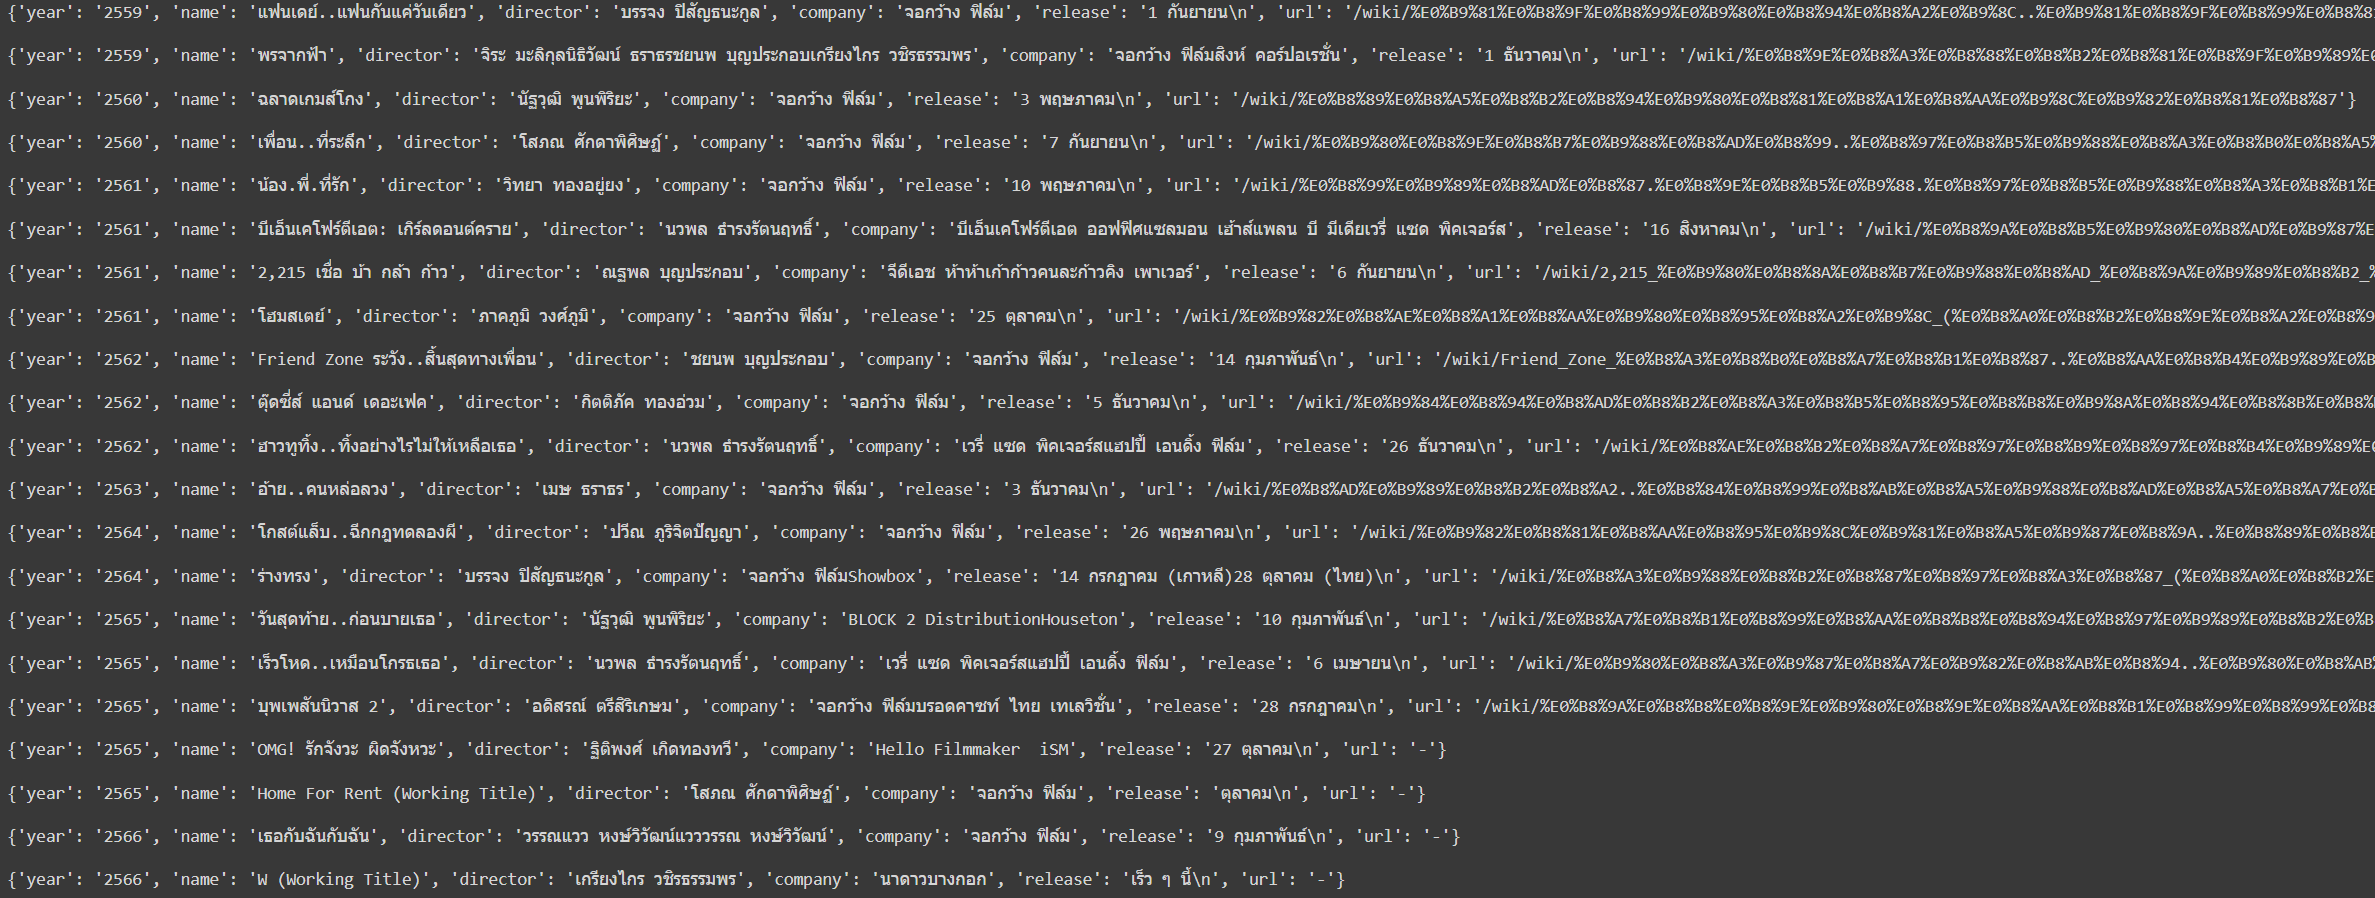

นำข้อมูลรายได้ของหนังแต่ละเรื่อง (เฉพาะภาพยนตร์ที่มี link) มาแสดงผล 

In [31]:
# 4.1.5 : แสดงผลรายได้ของหนังแต่ละเรื่อง

for movie in movies:
    print('Processing ' + movie['name'] + '...')
    try:
        movie_url = 'http://th.wikipedia.com' + movie['url']
        movie_html = urllib.request.urlopen(movie_url)
        movie_soup = BeautifulSoup(movie_html, 'html.parser')
    
        # ค้นหารายได้ของภาพยนตร์
        income_td = movie_soup.find('th', string='ทำเงิน').find_next('td')
        movie['gross'] = income_td.text.split(" ")[0]
    except Exception as e:
        movie['gross'] = 'unknown'
    
    # มารยาทในการดึงข้อมูลเราควรที่จะต้องใส่ sleep เพื่อไม่ให้ server ทำงานหนักเกินไป
    sleep(1) 

Processing แฟนเดย์..แฟนกันแค่วันเดียว...
Processing พรจากฟ้า...
Processing ฉลาดเกมส์โกง...
Processing เพื่อน..ที่ระลึก...
Processing น้อง.พี่.ที่รัก...
Processing บีเอ็นเคโฟร์ตีเอต: เกิร์ลดอนต์คราย...
Processing 2,215 เชื่อ บ้า กล้า ก้าว...
Processing โฮมสเตย์...
Processing Friend Zone ระวัง..สิ้นสุดทางเพื่อน...
Processing ตุ๊ดซี่ส์ แอนด์ เดอะเฟค...
Processing ฮาวทูทิ้ง..ทิ้งอย่างไรไม่ให้เหลือเธอ...
Processing อ้าย..คนหล่อลวง...
Processing โกสต์แล็บ..ฉีกกฎทดลองผี...
Processing ร่างทรง...
Processing วันสุดท้าย..ก่อนบายเธอ...
Processing เร็วโหด..เหมือนโกรธเธอ...
Processing บุพเพสันนิวาส 2...
Processing OMG! รักจังวะ ผิดจังหวะ...
Processing Home For Rent (Working Title)...
Processing เธอกับฉันกับฉัน...
Processing W (Working Title)...


In [32]:
for m in movies:
    print('"%s", "%s", "%s", "%s ล้านบาท"' % 
          (m['name'], m['release'], m['director'], m['gross']))

"แฟนเดย์..แฟนกันแค่วันเดียว", "1 กันยายน", "บรรจง ปิสัญธนะกูล", "111 ล้านบาท"
"พรจากฟ้า", "1 ธันวาคม", "จิระ มะลิกุลนิธิวัฒน์ ธราธรชยนพ บุญประกอบเกรียงไกร วชิรธรรมพร", "43 ล้านบาท"
"ฉลาดเกมส์โกง", "3 พฤษภาคม", "นัฐวุฒิ พูนพิริยะ", "113 ล้านบาท"
"เพื่อน..ที่ระลึก", "7 กันยายน", "โสภณ ศักดาพิศิษฏ์", "35 ล้านบาท"
"น้อง.พี่.ที่รัก", "10 พฤษภาคม", "วิทยา ทองอยู่ยง", "149 ล้านบาท"
"บีเอ็นเคโฟร์ตีเอต: เกิร์ลดอนต์คราย", "16 สิงหาคม", "นวพล ธำรงรัตนฤทธิ์", "13.35 ล้านบาท"
"2,215 เชื่อ บ้า กล้า ก้าว", "6 กันยายน", "ณฐพล บุญประกอบ", "7.36 ล้านบาท"
"โฮมสเตย์", "25 ตุลาคม", "ภาคภูมิ วงศ์ภูมิ", "68 ล้านบาท"
"Friend Zone ระวัง..สิ้นสุดทางเพื่อน", "14 กุมภาพันธ์", "ชยนพ บุญประกอบ", "134 ล้านบาท"
"ตุ๊ดซี่ส์ แอนด์ เดอะเฟค", "5 ธันวาคม", "กิตติภัค ทองอ่วม", "unknown ล้านบาท"
"ฮาวทูทิ้ง..ทิ้งอย่างไรไม่ให้เหลือเธอ", "26 ธันวาคม", "นวพล ธำรงรัตนฤทธิ์", "57 ล้านบาท"
"อ้าย..คนหล่อลวง", "3 ธันวาคม", "เมษ ธราธร", "56.07 ล้านบาท"
"โกสต์แล็บ..ฉีกกฎทดลองผี", "26 พฤษภาคม", "ปวีณ ภูริจิตปัญญา", "unknown ล้านบาท"
"ร่